In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

https://archive.ics.uci.edu/dataset/45/heart+disease

In [3]:
df = pd.read_csv("final_named_data.csv", index_col='id')
df.head()

,Unnamed: 0,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,76,77,78,81,84,85,86,87,88,name
id,,,,,,,,,,,,,,,,,,,,,
1,0,15943882.0,63,1,NaN,NaN,NaN,NaN,1.0,145.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
2,1,15964847.0,67,1,NaN,NaN,NaN,NaN,4.0,160.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
3,2,15952199.0,67,1,NaN,NaN,NaN,NaN,4.0,120.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
4,3,15929464.0,37,1,NaN,NaN,NaN,NaN,3.0,130.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
6,4,11961207.0,41,0,NaN,NaN,NaN,NaN,2.0,130.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name


In [4]:
df.shape

(1541, 83)

In [5]:
df.isna().sum()

Unnamed: 0       0
ccf              6
age              0
sex              0
painloc        446
painexer       769
relrest        779
pncaden        789
cp               1
trestbps        58
htn             44
chol           200
smoke         1140
cigs           890
years          899
fbs             92
dm               0
famhist        871
restecg          2
ekgmo          148
ekgday         153
ekgyr          148
dig            180
prop           178
nitr           181
pro            177
diuretic       222
27             208
thaldur         55
thaltime       654
met            150
thalach        151
thalrest       153
tpeakbps       162
trestbpd       167
tpeakbpd       158
36             159
exang          157
xhypo          159
oldpeak        158
slope          403
rldv5         1059
rldv5e        1059
ca            1232
restckm       1479
exerckm       1480
restef        1537
restwm        1535
50            1142
51            1479
52            1523
cmo            496
cday        

**TO DROP:**
- ccf - social security number
- restckm (1479 nan)
- exerckm (1480 nan)
- restef (1537 nan)
- restwm (1535)
- 51 (1479)
- 52 (1523)
- junk (1420)
- 76 (1499)
- 77 (1504)
- 78 (1374)
- 81 (1450)
- 84 (1454)
- name

In [6]:
df = df.drop(['Unnamed: 0', 'ccf', 'restckm', 'exerckm', 'restef', 'restwm', '51', '52', 'junk:', '76', '77', '78', '81', '84', 'name'], axis=1)
df.head()

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,...,lvx2,lvx3,lvx4,lvf,cathef,75,85,86,87,88
id,,,,,,,,,,,,,,,,,,,,,
1,63,1,NaN,NaN,NaN,NaN,1.0,145.0,1.0,233.0,...,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0
2,67,1,NaN,NaN,NaN,NaN,4.0,160.0,1.0,286.0,...,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0
3,67,1,NaN,NaN,NaN,NaN,4.0,120.0,1.0,229.0,...,1.0,1.0,7.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0
4,37,1,NaN,NaN,NaN,NaN,3.0,130.0,0.0,250.0,...,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0
6,41,0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,204.0,...,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0


In [7]:
categorical = ['sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp', 'htn', 'smoke', 'fbs', 'dm', 'famhist', 'restecg', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'exang', 'xhypo', 'slope', 'ca', '50', 'lmt', 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf',
        '75', '85', '86', '87', '88']   
numeric = ['age', 'trestbps', 'chol', 'cigs', 'years', '27', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'trestbpd', 'tpeakbpd', '36', 'oldpeak', 'rldv5', 'rldv5e', 'cathef']

In [8]:
df.columns

Index(['age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp',
       'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm',
       'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr',
       'pro', 'diuretic', '27', 'thaldur', 'thaltime', 'met', 'thalach',
       'thalrest', 'tpeakbps', 'trestbpd', 'tpeakbpd', '36', 'exang', 'xhypo',
       'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', '50', 'cmo', 'cday', 'cyr',
       'num', 'lmt', 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1',
       'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf',
       'cathef', '75', '85', '86', '87', '88'],
      dtype='object')

**Related columns:**

1. ECG - Electrocardiogram:
- ekgmo - month
- ekgday - day
- ekgyr - year
  
  (I would create 1 column from these 3 columns (ekgmo, ekgday, ekgyr))
  
- restecg - resting electrocardiographics results
- dig
- prop
- nitr
- pro
- diuretic

2. Cardiac cath - catheterization (kardiologiczne cewnikowanie serca):
- cmo - month
- cday - day
- cyr - year
  
    (I would create 1 column from these 3 columns (cmo, cday, cyr))

In [25]:
df[['cday', 'cmo', 'cyr']].head()

,cday,cmo,cyr
id,,,
1,16.0,2.0,1981.0
2,5.0,2.0,1981.0
3,20.0,2.0,1981.0
4,4.0,2.0,1981.0
6,18.0,2.0,1981.0


In [9]:
# if not smoke -> cigs=0
# if cigs=0 -> smoke=0
# if cigs != 0 -> smoke = 1
df.loc[df['smoke']==0, 'cigs'] = 0
df.loc[df['cigs']==0, 'smoke'] = 0
df.loc[(df['cigs']!=0) & (df['cigs'].notna()), 'smoke'] = 1

# in my opinion 'smoke' column isn't necessary

In [10]:
df[['smoke', 'cigs']].head()

,smoke,cigs
id,,
1,1.0,50.0
2,1.0,40.0
3,1.0,20.0
4,0.0,0.0
6,0.0,0.0


In [15]:
len(numeric)

19

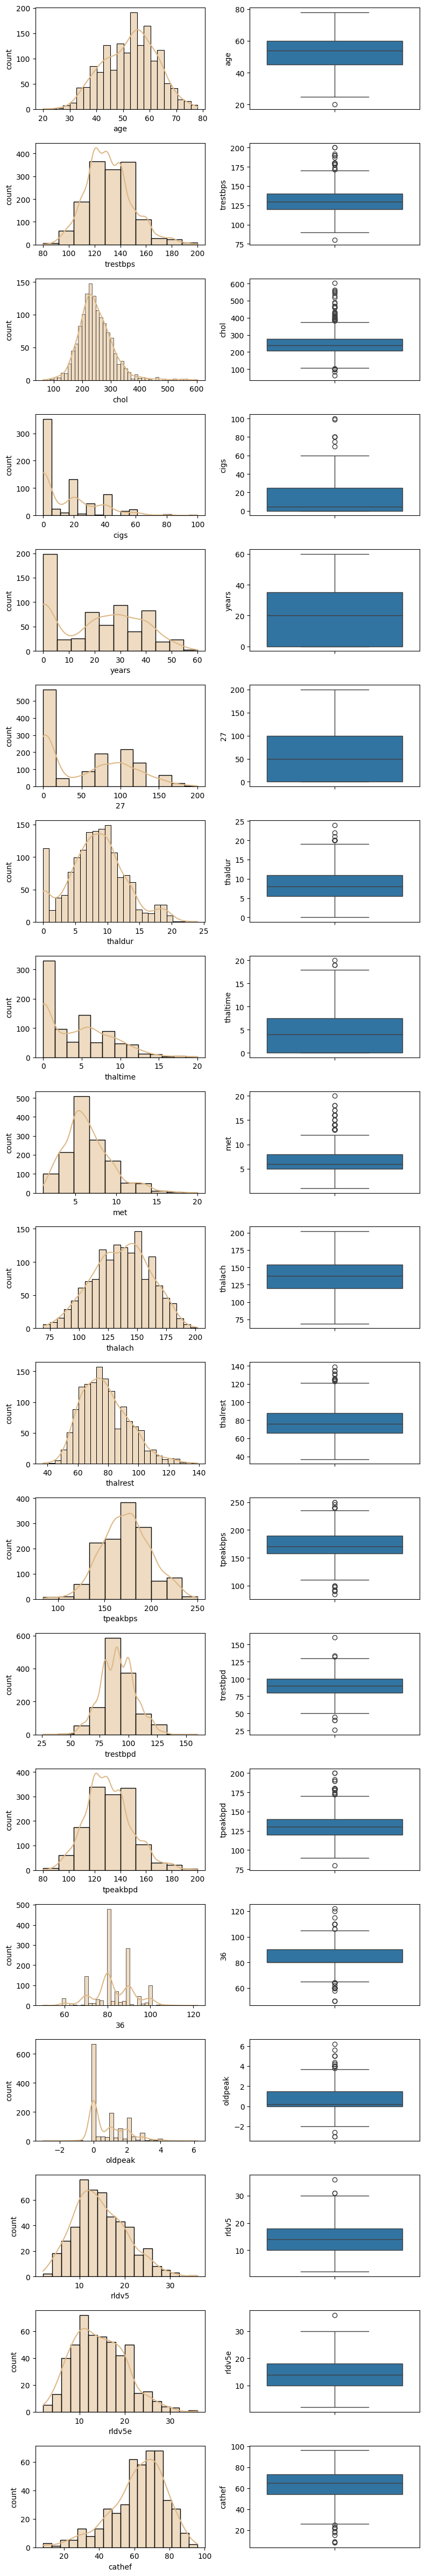

In [29]:
plt.figure(figsize=(8,48))
for i, col in enumerate(numeric):
    plt.subplot(19, 2, 2*i+1)
    if col in ['trestbps', 'met', 'tpeakbps', 'trestbpd', 'tpeakbpd'] :
        sns.histplot(df[col].dropna(), color='burlywood', kde=True, bins=10) 
    else:
        sns.histplot(df[col].dropna(), color='burlywood', kde=True)
    #sns.histplot(df[col].dropna(), color='burlywood', kde=True)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(19, 2, 2*i+2)
    sns.boxplot(df[col])
plt.tight_layout()

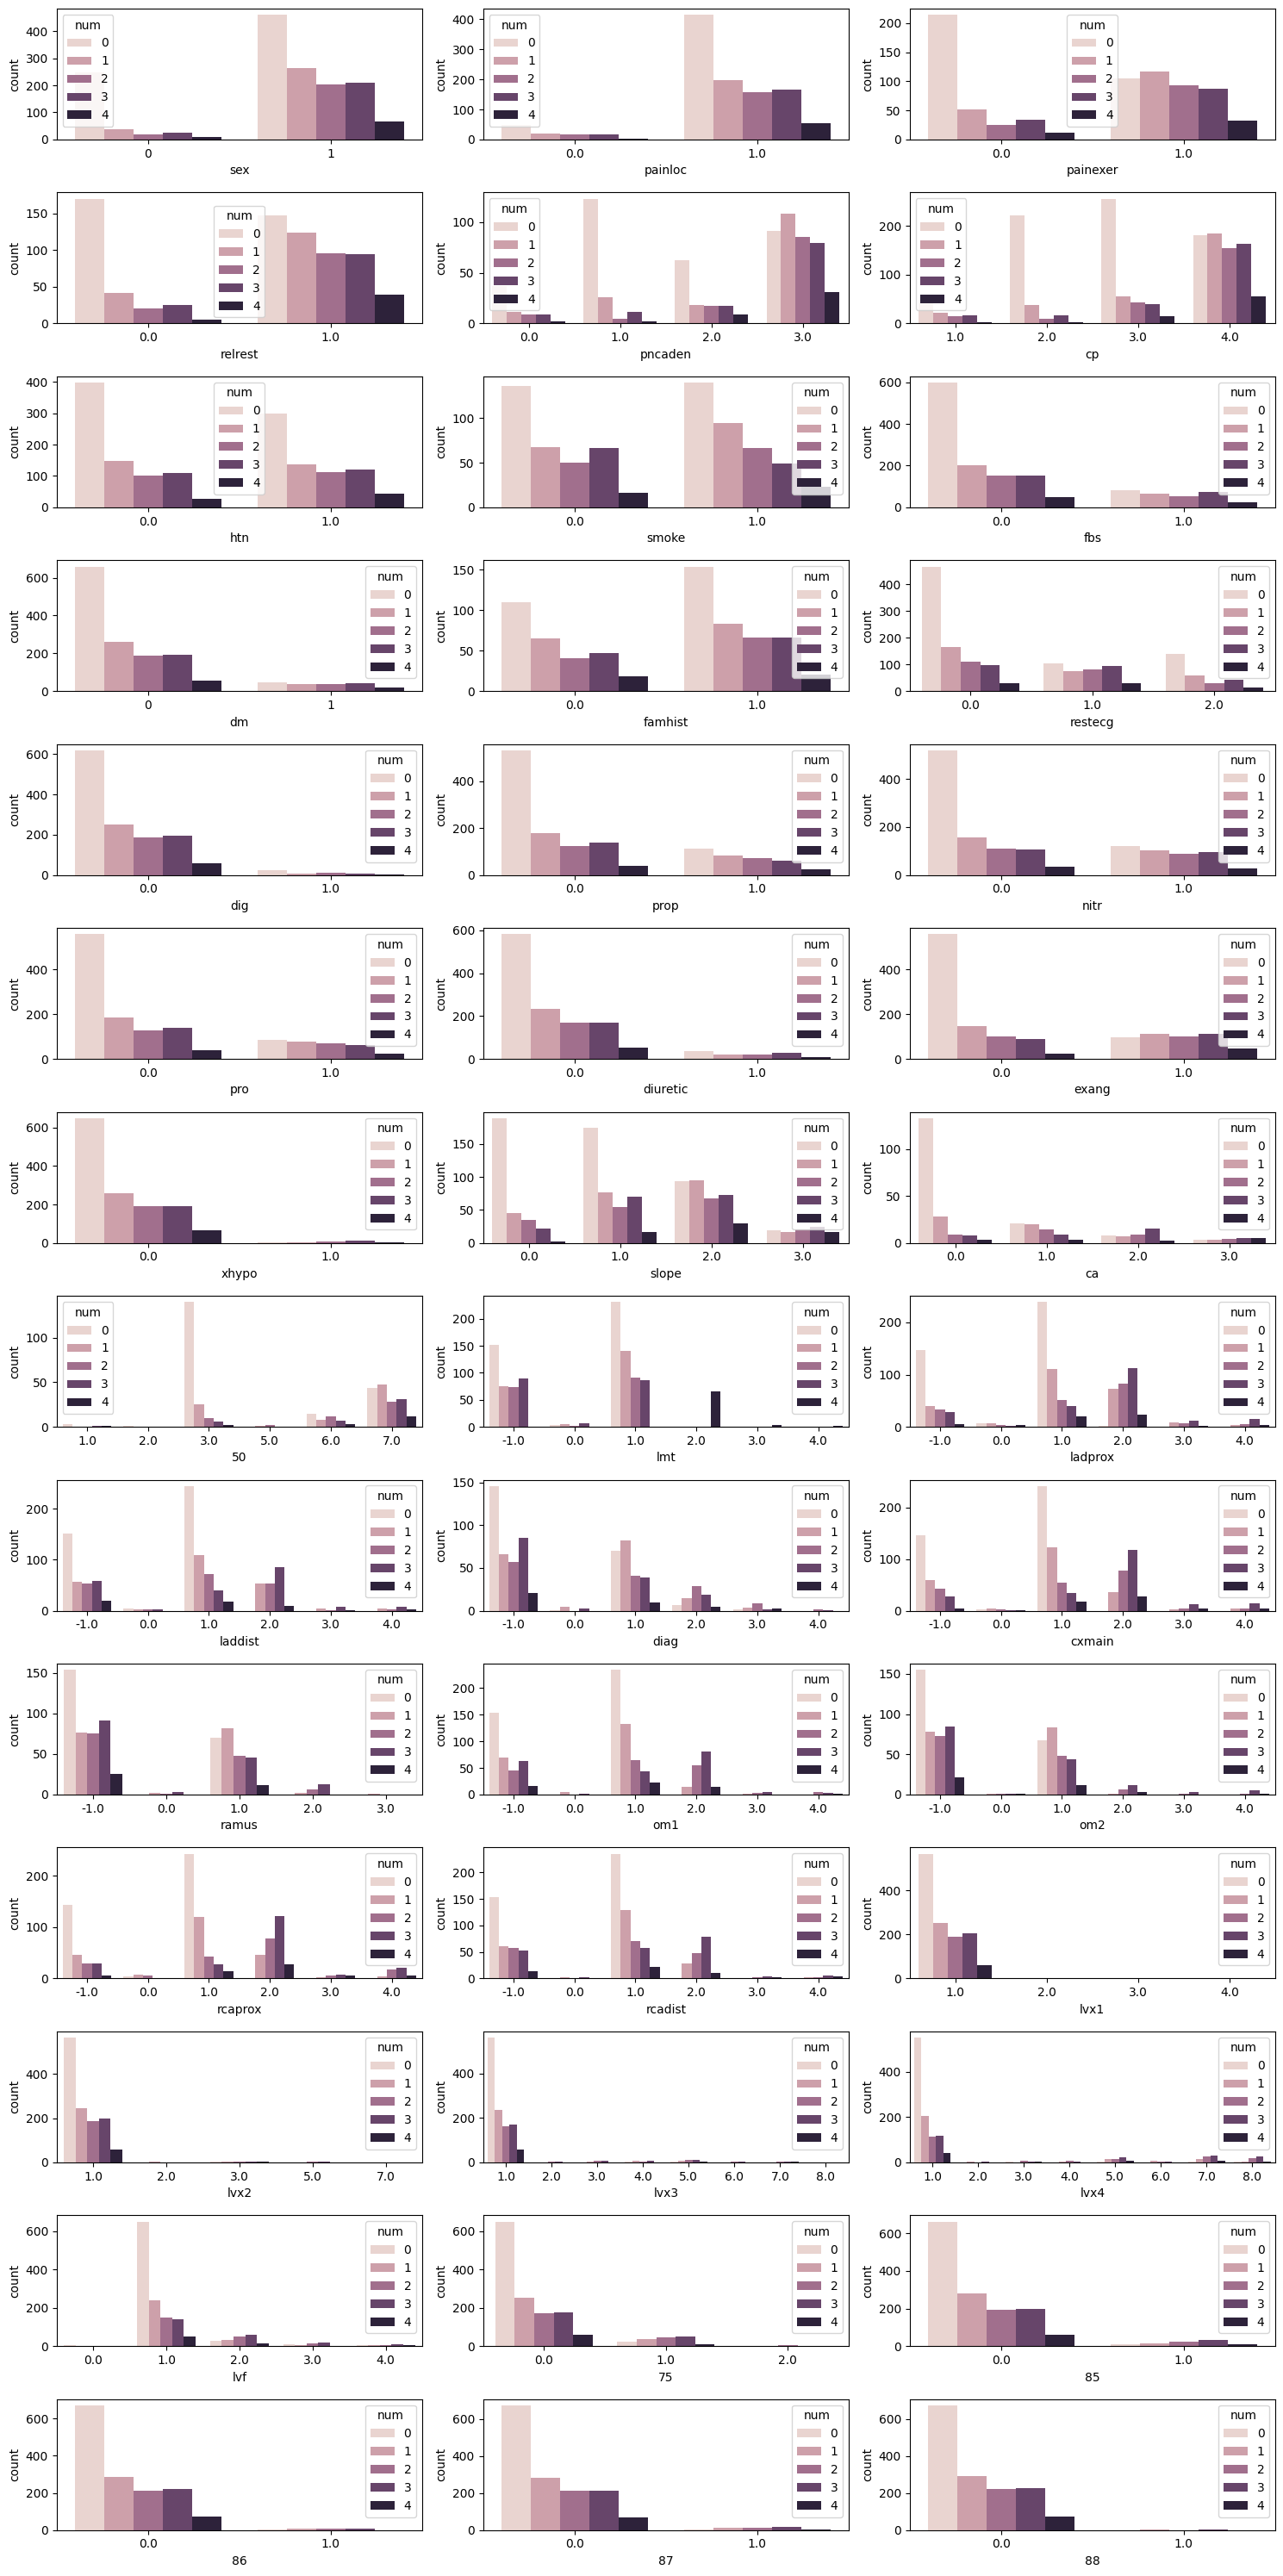

In [12]:
plt.figure(figsize=(15,30))
for i, col in enumerate(categorical):
    plt.subplot(14, 3, i+1)
    df_cleaned = df.dropna(subset=[col, 'num'])
    sns.countplot(x=col, data=df_cleaned, hue='num')
plt.tight_layout()

In [13]:
df['num'].unique()  #target

array([0, 2, 1, 3, 4])

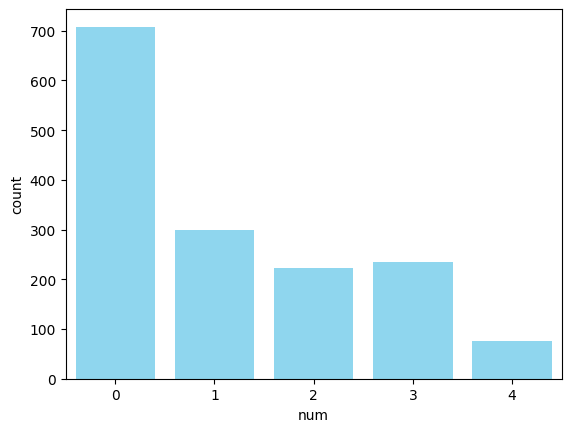

In [14]:
sns.countplot(x=df['num'], color='deepskyblue', alpha=0.5)
plt.show()

There is a noticeable imbalance in the data, with the majority of records representing healthy patients and the fewest corresponding to those in the most severe stage.